In [106]:
import pandas as pd

df = pd.read_csv("/content/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [107]:
df.shape

(301, 9)

In [108]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [109]:
cat = df.iloc[:,5:]
for i in cat:
  print(df[i].unique())


['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [110]:
from datetime import date

cur_date = date.today()

In [111]:
df['Car_Age'] = cur_date.year - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [112]:
df.drop(['Year','Car_Name'],axis = 1,inplace = True)

In [113]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [114]:
df = pd.get_dummies(df,drop_first = True)

In [115]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


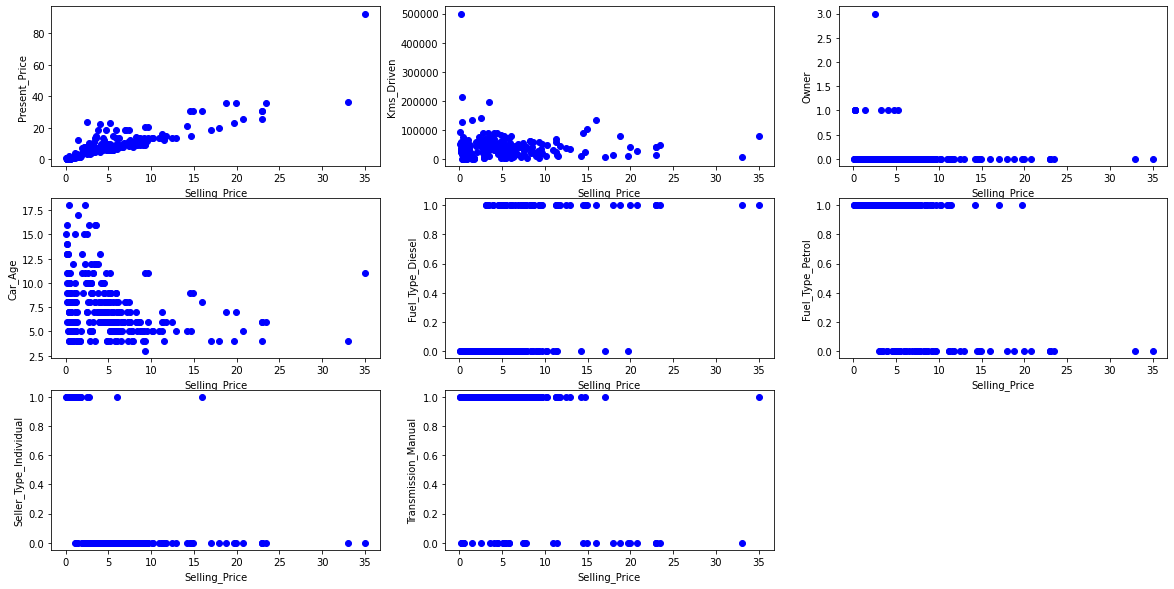

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (20,10))
 
j = 1
for i in df.iloc[:,1:]:
  plt.subplot(3,3,j)
  j += 1
  x = df['Selling_Price']
  y = df[i]
  plt.scatter(x,y,color = 'b')
  plt.xlabel('Selling_Price')
  plt.ylabel(i)



<BarContainer object of 8 artists>

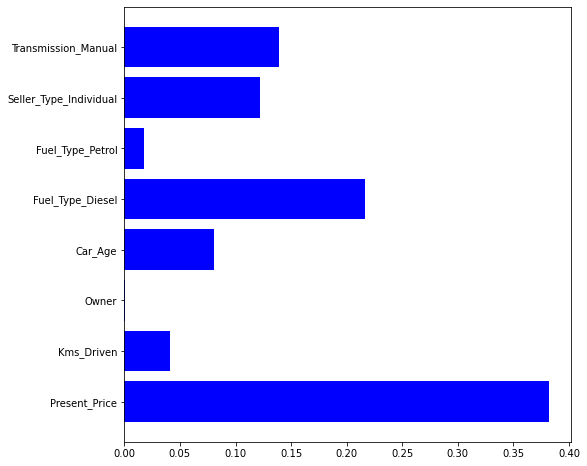

In [117]:
y = df.iloc[:,0]
X = df.iloc[:,1:]

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

importance = pd.Series(model.feature_importances_,index = X.columns)
plt.figure(figsize = (8,8))
plt.barh(X.columns,importance,color = 'b')


In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [119]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

In [120]:
#Hyperparameter tuning

In [121]:
import numpy as np

n_estimators = np.arange(100,1300,100)
max_features = ['auto','sqrt']
max_depth = np.arange(5,35,5)
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]


In [122]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators' : n_estimators,
        'max_features': max_features,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

In [123]:
rf_random = RandomizedSearchCV(estimator = rf_model,param_distributions = grid,scoring = 'neg_mean_squared_error',n_iter = 10,cv = 5,verbose = 2,random_state = 42,n_jobs = 1)

rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   43.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [124]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [125]:
rf_random.best_score_

-4.018018960312395

In [126]:
pred = rf_random.predict(X_test)
print(pred)

[ 7.1271      0.5453      5.02406333  9.20112    16.53568     5.08809
  3.4161      0.76598     4.52817     4.5109      3.09427     0.86368
  4.98319     7.92244     7.91184    10.48825     7.39936     4.09655333
  0.4806      1.47605     3.85061     4.65784     5.4248      9.53222
  0.23177     0.78043     0.48105     0.63745     0.49773     4.78991
  5.01117     5.811       0.51788     8.82334     3.4946      1.16678
  5.70861     7.24053     0.23645     8.98153     9.28996    19.4263
  4.93844     4.16095     5.39755    11.88935     0.31551     0.89981
  4.9577      8.23957     7.46681     3.5227      4.68125    20.73623
  1.09403     1.05009     0.50153     2.7665      3.7058      1.28182
  3.92146     9.07255     3.1968     21.26471     4.18279333  5.63397
 10.21857     4.91195     0.52846     3.03082     3.31689     3.0355
  0.63932     5.4781875   0.88371     3.04079     0.51209     9.14191
  1.25139     2.7299      0.51178    10.0544      7.41502     5.41059
  5.13887     0.952

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


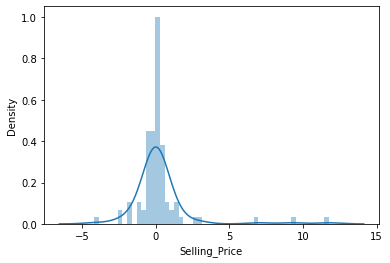

In [127]:
import seaborn as sns

sns.distplot(y_test - pred)

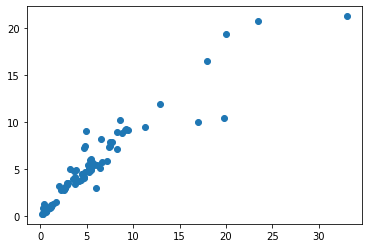

In [128]:
plt.scatter(y_test,pred)

In [129]:
import pickle
file = open("car_price_regression_model",'wb')
pickle.dump(rf_random,file)

In [130]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test,pred))
print('MSE' , metrics.mean_squared_error(y_test,pred))
print('RMSE' , np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE 0.8670868864468877
MSE 3.864081733803435
RMSE 1.9657267698750596
